In [1]:
%pylab inline
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


# Shape tensor definition: 

\begin{equation}
S_{i,j} = \dfrac{\sum_{k} m_k (r_{k})_i (r_{k})_j} {\sum_{k} m_k w(r)_k}
\end{equation}
Where $w(r)$ is the weight function defined as:

\begin{equation}
w(r) = \dfrac{1}{r_{ell}^2}
\end{equation}

Where the elliptical radius $r_{ell}$ is defined as:

\begin{equation}
r_{ell} = \sqrt{x_{ell}^2 + \dfrac{y_{ell}^2}{(b/a)^2} + \dfrac{z_{ell}^2}{(c/a)^2}}
\end{equation}

Where the $c \leq b \leq a$

For our purporses all of the particles have the same mass then the shape tensor can be expressed as:

\begin{equation}
S_{i,j} = \dfrac{\sum_{k}  (r_{k})_i (r_{k})_j} {\sum_{k}  w(r_{ell})_k}
\end{equation}



## Iterative process

1. Define a spherical shell of radius 1 kpc at a given radius from the center.
2. Compute $S_{i,j}$ for the particles inside the spherical shell
3. Compute the axis length and orientation
4. Make an ellipsoidal shell deformed with the previous axis length
5. 

In [2]:
def shells(x, y, z, width, r, q, s):
    r_shell = np.sqrt(x**2.0 +y**2.0/q**2.0 +  z**2.0/s**2.0)
    index = np.where((r_shell<r) & (r_shell>r-width))[0]
    x_shell = x_sph[index]
    y_shell = y_sph[index]
    z_shell = z_sph[index]
    return x_shell, y_shell, z_shell

In [93]:
#Function that computes the Shape tensor
def shape_tensor(x, y, z):
    N = len(x)
    XYZ = np.array([x, y, z])
    shape_T = np.zeros([3, 3])
    for i in range(3):
        for j in range(3):
            XX = np.zeros(N)
            for n in range(N):
                XX[n] = XYZ[i,n] * XYZ[j,n]
            shape_T[i][j] = sum(XX) / N
    return shape_T        

# Computing the axis ratios using the Shape Tensor
def axis_ratios(shape_T):
    eival, evec = eig(shape_T)
    oeival = sort(eival)
    #print oeival
    a = oeival[2]
    b = oeival[1]
    c = oeival[0]
    s = np.sqrt(c/a)
    q = np.sqrt(b/a)
    return evec, s, q

#
def rotation(X, Y, Z, rot_matrix):
    coordiantes = np.array([X, Y, Z])
    rot_coordinates = dot(rot_matrix, coordiantes)
    return rot_coordinates[0], rot_coordinates[1], rot_coordinates[2]
 
# Selecting shells that 
def reshape(x, y, z, r, dr, tol):
    s_i = 1.0
    q_i = 1.0
    x_shell, y_shell, z_shell = shells(x, y, z, dr, r, s_i, q_i)
    s_tensor = shape_tensor(x_shell, y_shell, z_shell)
    rot_i, s, q = axis_ratios(s_tensor)
    t = 0
    print s, q
    scatter(x_shell, y_shell, alpha=0.4, c='r')
    while ((abs(s-s_i)>tol) & (abs(q-q_i)>tol)):
        t +=1
        s_i, q_i = s, q
        x_shell, y_shell, z_shell = shells(x, y, z, dr, r, s_i, q_i)
        s_tensor = shape_tensor(x_shell, y_shell, z_shell)
        rot, s, q = axis_ratios(s_tensor)
    scatter(x_shell, y_shell, s=15, alpha=0.3)
    return s, q

In [4]:
# Function that generates an ellipsoid
def ellipsoid(N, a, b, c, Theta):
    phi = random.rand(N) * 2*pi
    theta = random.rand(N) * 2 - 1
    R = random.rand(N)
    X = a*R**(1/3.0) * sin(phi) * sin(arccos(theta))
    Y = b*R**(1/3.0) * cos(phi) * sin(arccos(theta))
    Z = c*R**(1/3.0) * cos(arccos(theta))
    X_rot = X*cos(Theta) - Y*sin(Theta)
    Y_rot = X*sin(Theta) + Y*cos(Theta)
    return X, Y, Z

In [88]:
x_sph, y_sph, z_sph = ellipsoid(10000, 1.2, 1, 1, 1.0)
D = np.array([x_sph, y_sph, z_sph])

0.717805979105 0.731572126945


(0.40672690106236525, 0.43687918724404518)

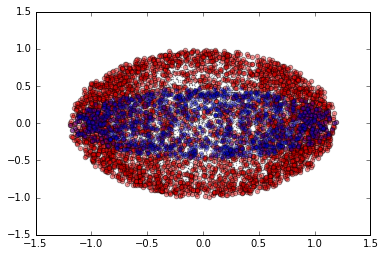

In [95]:
scatter(x_sph, y_sph, s=0.1, alpha=0.5)
reshape(x_sph, y_sph, z_sph, 1.2, 0.3, 1E-4)


(-1, 1)

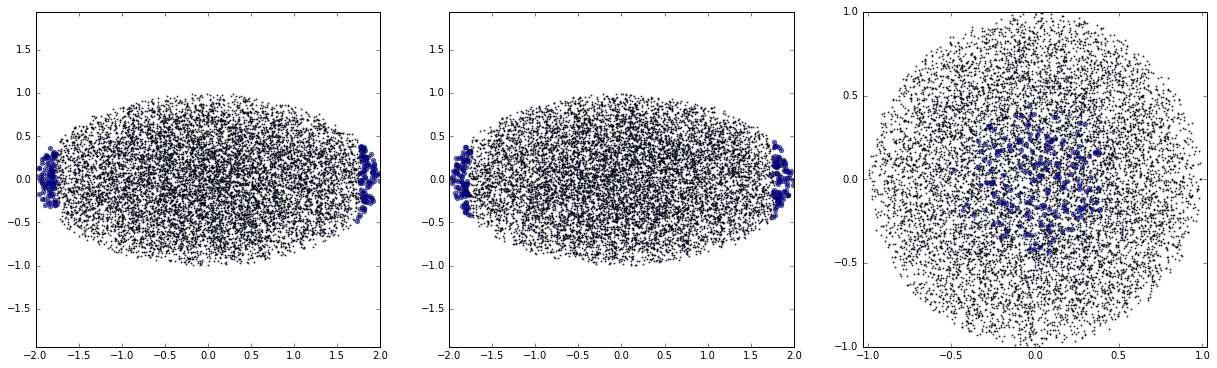

In [54]:
x_ell, y_ell, z_ell = shells(x_sph, y_sph, z_sph, 0.2, 2.0, 1.0, 1.0)
figure(figsize=(21, 6))
subplot(1, 3, 1)
scatter(x_sph, y_sph, s=1, alpha=0.7)
scatter(x_ell, y_ell, alpha=0.5)
axis('equal')
xlim(-2, 2)
ylim(-1.5, 1.5)

subplot(1, 3, 2)
scatter(x_sph, z_sph, s=1, alpha=0.7)
scatter(x_ell, z_ell, alpha=0.5, c='b')
axis('equal')
xlim(-2, 2)
ylim(-1, 1)

subplot(1, 3, 3)
scatter(y_sph, z_sph, s=1, alpha=0.7)
scatter(y_ell, z_ell, alpha=0.5)
axis('equal')
xlim(-1, 1)
ylim(-1, 1)

In [167]:
S_test = shape_tensor(x_ell, y_ell, z_ell)
rot, s, q = axis_ratios(S_test)
print s, q
print S_test

#x_ell, y_ell, z_ell = shells(x_sph, y_sph, z_sph, 0.1, 2.0, q, s)
rot_x, rot_y, rot_z = rotation(x_ell, y_ell, z_ell, rot)
x_ell2, y_ell2, z_ell2 = shells(x_sph, y_sph, z_sph, 0.2, 2.0, q, s)



0.115258609614 0.118681994283
[[  3.39699564e+00  -1.22431727e-02   1.83119039e-02]
 [ -1.22431727e-02   4.60689983e-02  -1.34512491e-03]
 [  1.83119039e-02  -1.34512491e-03   4.70554907e-02]]


(-3.0, 3.0, -0.60000000000000009, 0.60000000000000009)

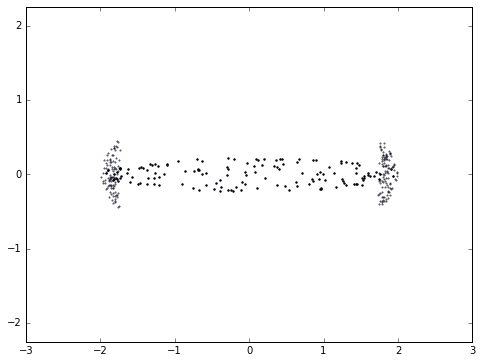

In [168]:
figure(figsize=(8, 6))
scatter(x_ell2, z_ell2, s=2)
scatter(x_ell, z_ell, s=2, marker='*', alpha=0.5)
axis('equal')

In [169]:
S_test = shape_tensor(rot_x, rot_y, rot_z)
rot, s, q = axis_ratios(S_test)
print s, q

0.115258609614 0.118681994283


In [99]:
S_test = shape_tensor(x_ell, y_ell, z_ell)
s, q = axis_ratios(S_test)
print s, q
print S_test


0.0897925000971 0.105015408205
[[  9.34663345e-01  -2.14373254e-03   2.50004195e-03]
 [ -2.14373254e-03   1.03090894e-02   9.53962980e-05]
 [  2.50004195e-03   9.53962980e-05   7.54643766e-03]]


In [ ]:
shape_tensor(x_sph, y_sph, z_sph)

The eigenvalues represents the axis ratios of the new set of principal axis. 

In [49]:
eival, evec = eig(S_test)
print evec
print eival
print sqrt(eival[0]), sqrt(eival[1]), sqrt(eival[2])

[[-0.69831448 -0.57542556 -0.42572563]
 [-0.71574224  0.56828612  0.40591123]
 [-0.00836228 -0.58816351  0.80869881]]
[ 0.81441776  0.18956492  0.20066   ]
0.902450973878 0.435390535193 0.447950887271


In [55]:
tt = dot(evec, D)


(-1.5, 1.5, -1.5, 1.5)

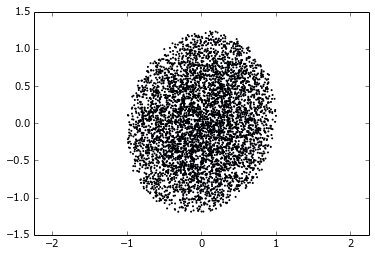

In [59]:
scatter(tt[1,:], tt[2,:], s=1)
axis('equal')

In [31]:
best_s, best_q = iteration(x_sph, y_sph, z_sph, 1E-3)

In [32]:
print best_s, best_qb

0.492070808228 0.496093444885
